In [121]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mplt
from matplotlib import rcParams
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import rc
import matplotlib.colors as colors
import cartopy.io.shapereader as shpreader

rc('mathtext', default='regular') 
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'cm'
rcParams['mathtext.rm'] = 'serif'
rcParams['font.size'] = 12
import geopandas as gpd
import cmasher as cmr

zcta = gpd.read_file('../Data/tl_2010_35_zcta510/tl_2010_35_zcta510.shp')
esri = gpd.read_file('../Data/ESRI_zips/NM_ZIPCODES_2019_ESRI.shp')

In [122]:
smoke = pd.read_csv('../Data/smoke/KateZip/AllZipSmoke_Total_os.csv')
listZCTA =  smoke['Zip'].unique().astype(str)

In [123]:
smoke['Zip'].loc[~smoke['Zip'].astype(str).str.startswith('8', na=False)].unique()

array([79837], dtype=int64)

Text(0.5, 1.0, 'ESRI file')

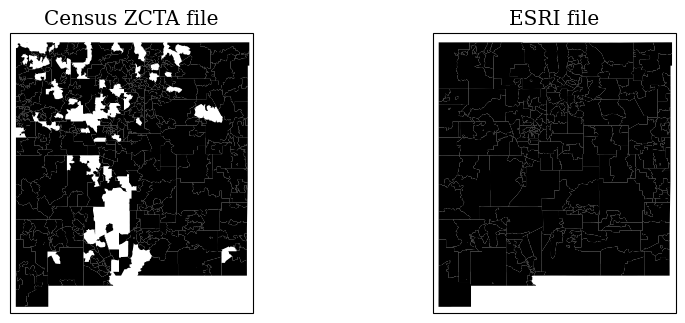

In [124]:
fig = plt.figure(figsize = (10,8))
ax1 = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())
ax1.set_extent([-109.2, -102.9, 31.2, 37.2], ccrs.PlateCarree())
zcta.plot(ax = ax1, color = 'k')
ax1.set_title('Census ZCTA file')

ax2 = fig.add_subplot(2, 2, 2, projection=ccrs.PlateCarree())
ax2.set_extent([-109.2, -102.9, 31.2, 37.2], ccrs.PlateCarree())
esri.plot(ax = ax2, color = 'k')
ax2.set_title('ESRI file')

In [125]:
ED_original = pd.read_csv("C:/Users/olivia.sablan/OneDrive - State of New Mexico/Documents/Data/health/ED/ED_data_multipleremoved.csv")
ED = ED_original.copy(deep = True)
ED = ED.rename(columns = {'ZIP': 'Zip', 'date_of_visit':'Date'})
ED['Zip'] = ED['Zip'].str[:5]
ED['Zip'] = pd.to_numeric(ED['Zip'], errors='coerce').fillna(0).astype(np.int64)
ED = ED[ED['Zip'] != 0]
ED['Zip'] = ED['Zip'].astype('str')
ED = ED.loc[(ED['Zip'].str.startswith('88', na=False)) | (ED['Zip'].str.startswith('87', na=False)) | (ED['Zip'] == '79837') | (ED['Zip'] == '81137') | (ED['Zip'] == '86504') | (ED['Zip'] == '86515')]
ED = ED[ED['Zip'].str.len() == 5]

C:\Users\olivia.sablan\AppData\Local\Temp\ipykernel_22432\1371847323.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  ED_original = pd.read_csv("C:/Users/olivia.sablan/OneDrive - State of New Mexico/Documents/Data/health/ED/ED_data_multipleremoved.csv")


In [126]:
(len(ED_original) - len(ED)) / len(ED_original) *100

1.1548424614083315

In [127]:
listESRI = esri['ZIP_CODE'].unique()
#listZCTA =  pd.to_numeric(zcta['ZCTA5CE10'].unique())

In [136]:
print('unmatched zips in ED with ZCTA: ', round(len(ED[~ED['Zip'].isin(listZCTA)])/len(ED)*100, 2), '%')

unmatched zips in ED with ZCTA:  1.98 %


In [135]:
print('unmatched zips in ED with ZCTA: ', round(len(ED[~ED['Zip'].isin(listESRI)])/len(ED)*100, 2), '%')

unmatched zips in ED with ZCTA:  5.1 %


In [130]:
notinZCTA = ED[~ED['Zip'].isin(listZCTA)]
notinESRI = ED[~ED['Zip'].isin(listESRI)]

In [131]:
notinZCTA['Zip'][~notinZCTA['Zip'].isin(notinESRI['Zip'])].unique()

array(['87547', '87060', '88439', '87131', '88133', '88213', '88123'],
      dtype=object)

In [134]:
zipcodesnotineither = ED['Zip'][~ED['Zip'].isin(listZCTA) & ~ED['Zip'].isin(listESRI)].unique()
df = pd.DataFrame(zipcodesnotineither, columns=['Zipcode'])
df.to_csv('../Data/ZipsnotinEITHERdataset.csv')